# importig packages

In [1]:
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers


# Making data set

In [2]:
#source folder 
folder=r"C:\Users\thota\OneDrive\Pictures\rrr\archive (3)\Cotton plant\Cotton plant"

In [3]:
data=tf.keras.utils.image_dataset_from_directory(folder,image_size=(60,60))

Found 2003 files belonging to 5 classes.


# The classes available in our data set is 

In [4]:
data1=data.class_names

In [5]:
data1

['Aphids', 'Army worm', 'Bacterial Blight', 'Healthy', 'Target spot']

In [6]:
#seeing the data as batches

In [7]:
data2=data.as_numpy_iterator()

In [8]:
data2.next()[1]

array([2, 0, 2, 2, 2, 1, 4, 0, 4, 3, 0, 2, 1, 2, 3, 0, 0, 1, 3, 2, 4, 3,
       0, 4, 3, 2, 2, 4, 3, 1, 2, 3])

In [9]:
len(data2.next()[1])

32

In [10]:
6*32

192

In [11]:
data.class_names

['Aphids', 'Army worm', 'Bacterial Blight', 'Healthy', 'Target spot']

# scalling down the given data 

In [12]:
data=data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [13]:
data.save??

In [14]:
data.as_numpy_iterator().next()[0].shape

(32, 60, 60, 3)

In [15]:
len(data)

63

# splitting of the data 

In [16]:
train_size=53
val_size=10




In [17]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)

In [18]:
input_shape=(60, 60, 3)

In [19]:
model = models.Sequential([
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu', padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(256, (3,3), activation = 'relu',padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(5, activation= 'softmax')
    
])

# summary of our model

In [20]:
model.compile(
    optimizer= 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [21]:
history = model.fit(train,
         epochs= 20,
         validation_data=val,
            )

Epoch 1/20
53/53 [==============================] - 62s 1s/step - loss: 1.5361 - accuracy: 0.3048 - val_loss: 1.3140 - val_accuracy: 0.4495
Epoch 2/20
53/53 [==============================] - 26s 448ms/step - loss: 1.2239 - accuracy: 0.4623 - val_loss: 1.1018 - val_accuracy: 0.5570
Epoch 3/20
53/53 [==============================] - 21s 385ms/step - loss: 1.1068 - accuracy: 0.5525 - val_loss: 1.0348 - val_accuracy: 0.5961
Epoch 4/20
53/53 [==============================] - 21s 383ms/step - loss: 0.9525 - accuracy: 0.6303 - val_loss: 1.0902 - val_accuracy: 0.5635
Epoch 5/20
53/53 [==============================] - 21s 385ms/step - loss: 0.8279 - accuracy: 0.6804 - val_loss: 0.7128 - val_accuracy: 0.7362
Epoch 6/20
53/53 [==============================] - 21s 382ms/step - loss: 0.7058 - accuracy: 0.7400 - val_loss: 1.0001 - val_accuracy: 0.6352
Epoch 7/20
53/53 [==============================] - 21s 381ms/step - loss: 0.6037 - accuracy: 0.7759 - val_loss: 0.5448 - val_accuracy: 0.8111
Ep

In [22]:
EPOCHS=20

In [23]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

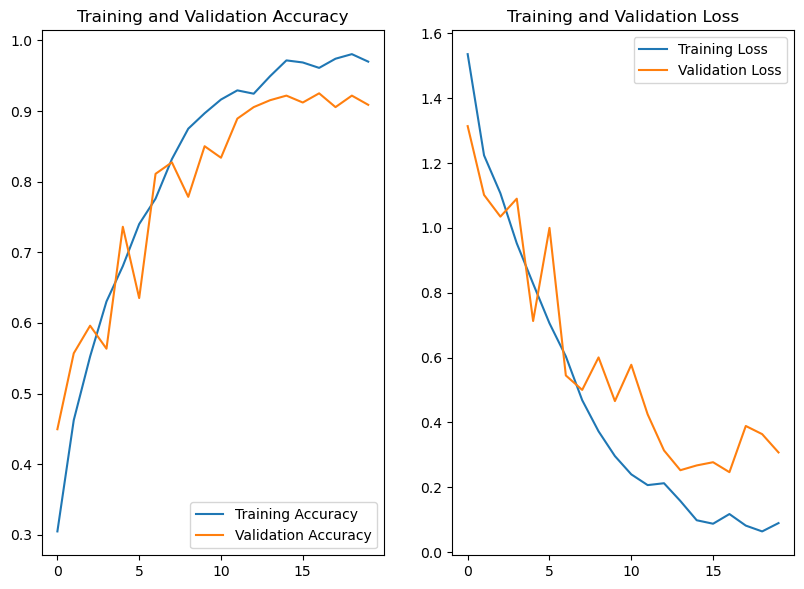

In [24]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

In [25]:
model.save('cotton_model.h5')

In [26]:
from keras.models import load_model

In [27]:
model1=load_model("cotton_model.h5")

In [28]:
def predict_disease(img):
    image=cv2.imread(img)
    resize=tf.image.resize(image,(60,60))
    scale=np.expand_dims(resize/255,0)
    pred=model1.predict(scale)
    print(pred)
    print(np.argmax(pred[0]))
   

In [29]:
folder1="C:\\Users\\thota\\OneDrive\\Pictures\\rrr\\archive (3)\\Cotton plant\\Cotton plant\\Aphids"

In [30]:
import os

In [46]:
for i in os.listdir(folder1):
    print(predict_disease(folder1+"\\"+i))

1/1 [==============================] - 0s 18ms/step
[[0.9525197  0.00631269 0.02110707 0.00181491 0.0182455 ]]
0
None
1/1 [==============================] - 0s 18ms/step
[[9.9393010e-01 3.1070996e-03 5.0858821e-04 6.6056251e-05 2.3882363e-03]]
0
None
1/1 [==============================] - 0s 18ms/step
[[9.8954612e-01 7.0706446e-05 9.4433322e-05 2.0035784e-05 1.0268687e-02]]
0
None
1/1 [==============================] - 0s 18ms/step
[[9.9999928e-01 1.4383000e-11 6.7012604e-07 3.9060729e-12 1.3343768e-12]]
0
None
1/1 [==============================] - 0s 24ms/step
[[0.3869291  0.00084175 0.13625655 0.01556224 0.46041033]]
4
None
1/1 [==============================] - 0s 22ms/step
[[9.9963701e-01 1.1951577e-04 3.5498349e-06 3.6917811e-07 2.3953323e-04]]
0
None
1/1 [==============================] - 0s 19ms/step
[[1.6923928e-01 8.3013711e-06 3.5945460e-02 6.7355932e-04 7.9413337e-01]]
4
None
1/1 [==============================] - 0s 19ms/step
[[9.5271099e-01 6.3252598e-03 1.4791521e-02 2.6

1/1 [==============================] - 0s 18ms/step
[[0.62438726 0.00231423 0.12037455 0.01241265 0.24051127]]
0
None
1/1 [==============================] - 0s 19ms/step
[[9.999275e-01 9.518593e-06 6.282254e-05 1.505014e-07 8.723758e-11]]
0
None
1/1 [==============================] - 0s 19ms/step
[[8.8888574e-03 1.1473728e-04 2.4136189e-02 5.4016784e-03 9.6145850e-01]]
4
None
1/1 [==============================] - 0s 19ms/step
[[3.1320184e-02 6.5378030e-05 2.4001466e-02 4.2542173e-03 9.4035882e-01]]
4
None
1/1 [==============================] - 0s 19ms/step
[[1.0000000e+00 6.8315028e-12 5.4309573e-12 4.0587251e-12 8.7858166e-13]]
0
None
1/1 [==============================] - 0s 19ms/step
[[9.9581784e-01 4.0950538e-03 2.9191784e-07 2.2314907e-06 8.4649386e-05]]
0
None
1/1 [==============================] - 0s 19ms/step
[[0.09004494 0.00628406 0.03745725 0.06450751 0.8017062 ]]
4
None
1/1 [==============================] - 0s 19ms/step
[[9.9158329e-01 8.3362748e-04 6.5894756e-03 9.573061

1/1 [==============================] - 0s 21ms/step
[[6.8035263e-01 3.1527571e-04 8.9405119e-02 3.1943852e-03 2.2673257e-01]]
0
None
1/1 [==============================] - 0s 18ms/step
[[0.5914319  0.00364162 0.1487873  0.00378194 0.2523572 ]]
0
None
1/1 [==============================] - 0s 18ms/step
[[9.9620324e-01 1.3052745e-03 1.0460949e-04 7.1854238e-06 2.3796433e-03]]
0
None
1/1 [==============================] - 0s 18ms/step
[[0.01800054 0.00280613 0.02230247 0.02007542 0.93681544]]
4
None
1/1 [==============================] - 0s 20ms/step
[[0.55874497 0.40658897 0.0007176  0.00232617 0.03162224]]
0
None
1/1 [==============================] - 0s 22ms/step
[[2.4494761e-01 2.1611475e-05 5.2555017e-02 2.1383704e-03 7.0033741e-01]]
4
None
1/1 [==============================] - 0s 19ms/step
[[6.8959039e-01 1.9790500e-04 2.5654855e-01 6.2232994e-04 5.3040769e-02]]
0
None
1/1 [==============================] - 0s 19ms/step
[[0.42694005 0.00075797 0.04010226 0.00924098 0.5229587 ]]
4
N

1/1 [==============================] - 0s 19ms/step
[[0.97595906 0.01205907 0.0020628  0.00132741 0.00859175]]
0
None
1/1 [==============================] - 0s 22ms/step
[[1.0000000e+00 4.9539893e-11 8.2538740e-09 1.4472336e-11 2.0533163e-14]]
0
None
1/1 [==============================] - 0s 18ms/step
[[9.9996948e-01 2.3505783e-05 2.6363050e-06 1.7995825e-08 4.3838154e-06]]
0
None
1/1 [==============================] - 0s 22ms/step
[[9.5481998e-01 3.6811538e-02 2.0767162e-03 3.5082124e-04 5.9409784e-03]]
0
None
1/1 [==============================] - 0s 19ms/step
[[9.81562376e-01 7.17319563e-06 1.10286735e-02 1.51779395e-05
  7.38652470e-03]]
0
None
1/1 [==============================] - 0s 22ms/step
[[9.9994564e-01 6.4649254e-07 1.0677961e-07 5.4497091e-06 4.8205256e-05]]
0
None
1/1 [==============================] - 0s 19ms/step
[[9.9904293e-01 7.6921919e-04 1.4245037e-04 1.1043499e-05 3.4319935e-05]]
0
None
1/1 [==============================] - 0s 20ms/step
[[9.9999070e-01 4.3139540

1/1 [==============================] - 0s 18ms/step
[[6.43896997e-01 4.33446803e-06 2.32816979e-01 5.52729543e-05
  1.23226345e-01]]
0
None
1/1 [==============================] - 0s 18ms/step
[[9.9929988e-01 5.7883924e-05 1.6514057e-05 1.2538875e-05 6.1313884e-04]]
0
None
1/1 [==============================] - 0s 18ms/step
[[9.9992073e-01 1.3015114e-07 1.3845989e-06 2.0373112e-07 7.7505436e-05]]
0
None
1/1 [==============================] - 0s 20ms/step
[[9.9983144e-01 6.8432394e-07 1.2315218e-05 5.7808453e-08 1.5559708e-04]]
0
None
1/1 [==============================] - 0s 21ms/step
[[9.9997365e-01 2.5968225e-08 6.4082734e-08 8.4048635e-09 2.6264901e-05]]
0
None
1/1 [==============================] - 0s 21ms/step
[[7.1745545e-01 3.8274599e-04 2.3813710e-02 2.7401075e-03 2.5560799e-01]]
0
None
1/1 [==============================] - 0s 20ms/step
[[9.7885865e-01 2.1401452e-04 2.7625647e-03 4.2864136e-05 1.8121907e-02]]
0
None
1/1 [==============================] - 0s 19ms/step
[[9.996374

1/1 [==============================] - 0s 18ms/step
[[9.9999416e-01 4.6828363e-10 3.4485267e-06 9.3546740e-11 2.3271984e-06]]
0
None
1/1 [==============================] - 0s 18ms/step
[[0.02107899 0.14818384 0.02909316 0.04183539 0.75980866]]
4
None
1/1 [==============================] - 0s 17ms/step
[[9.4186527e-01 4.9953319e-02 3.3407230e-03 5.3471985e-04 4.3058940e-03]]
0
None
1/1 [==============================] - 0s 17ms/step
[[9.9989009e-01 7.2789277e-05 1.4447637e-05 1.1721837e-06 2.1403212e-05]]
0
None
1/1 [==============================] - 0s 21ms/step
[[8.72822702e-01 1.23648815e-01 1.43150610e-04 3.04179965e-04
  3.08117503e-03]]
0
None
1/1 [==============================] - 0s 17ms/step
[[9.8564607e-01 1.1163583e-02 2.2041607e-03 8.5115847e-05 9.0104830e-04]]
0
None
1/1 [==============================] - 0s 18ms/step
[[0.06065476 0.00102619 0.01743786 0.01813003 0.9027511 ]]
4
None
1/1 [==============================] - 0s 18ms/step
[[7.9511184e-01 7.1049367e-06 3.2114394e

None
1/1 [==============================] - 0s 20ms/step
[[2.7901087e-02 1.8244862e-04 3.3189911e-02 1.3729419e-02 9.2499721e-01]]
4
None
1/1 [==============================] - 0s 20ms/step
[[9.4215053e-01 3.3879885e-04 1.1956769e-02 4.0664777e-04 4.5147251e-02]]
0
None
1/1 [==============================] - 0s 21ms/step
[[0.9310439  0.03540938 0.01640205 0.00225622 0.01488841]]
0
None
1/1 [==============================] - 0s 20ms/step
[[9.9999213e-01 4.0157648e-08 6.7841501e-07 7.9474125e-09 7.1397430e-06]]
0
None
1/1 [==============================] - 0s 20ms/step
[[9.9496162e-01 5.0365250e-04 3.4686876e-03 8.9333474e-04 1.7274717e-04]]
0
None
1/1 [==============================] - 0s 20ms/step
[[8.4668562e-02 3.2698875e-04 1.7487186e-01 5.9309592e-03 7.3420167e-01]]
4
None
1/1 [==============================] - 0s 20ms/step
[[6.4486629e-01 1.1149220e-04 1.3362205e-01 3.3692750e-03 2.1803086e-01]]
0
None
1/1 [==============================] - 0s 18ms/step
[[9.9485624e-01 9.7669987e-

In [44]:
fol=r"C:\Users\thota\OneDrive\Pictures\rrr\archive (3)\Cotton plant\Cotton plant\Army worm\15.jpg"

In [45]:
predict_disease(fol)

1/1 [==============================] - 0s 18ms/step
[[3.1924603e-05 9.9995053e-01 1.9473780e-06 1.0587524e-05 5.0158269e-06]]
1


In [37]:
model=tf.keras.models.load_model("cotton_model.h5")
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
open("converted_model.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\thota\AppData\Local\Temp\tmpkp4q96r7\assets


INFO:tensorflow:Assets written to: C:\Users\thota\AppData\Local\Temp\tmpkp4q96r7\assets


7945116